Load and preprocess real and synthetic data.

In [1]:
import numpy as np
import pandas as pd
dp_ori_df = pd.read_csv('synthetic data/doppelGANger/dp_ori.csv')
dp_gen_df = pd.read_csv('synthetic data/doppelGANger/dp_gen.csv')
tgan_ori_df = pd.read_csv('synthetic data/TGAN/tgan_ori.csv')
tgan_gen_df = pd.read_csv('synthetic data/TGAN/tgan_gen.csv')

In [5]:
def CutTimeSequence(a,time_sequence): #A function which transforms dataframe to array in shape (no_sample, time_seq, dimension)
    if type(a)==pd.core.frame.DataFrame:
        a = a.values
    l,d = a.shape
    new_a = np.zeros((int(l/time_sequence),time_sequence,d))
    for i in range(l):
        new_a[int(i/time_sequence),i%time_sequence,:]=a[i,:]
    return new_a

In [9]:
dp_ori_data = CutTimeSequence(dp_ori_df,130)
dp_gen_data = CutTimeSequence(dp_gen_df,130)

In [11]:
tgan_ori_data = CutTimeSequence(tgan_ori_df,10)
tgan_gen_data = CutTimeSequence(tgan_gen_df,10)

In [24]:
#fill all NaN's in data with 0
tgan_ori_data[np.isnan(tgan_ori_data)]=0
tgan_gen_data[np.isnan(tgan_gen_data)]=0

Plotting codes

In [2]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

   
def visualization (ori_data, generated_data, analysis):
    """Using PCA or tSNE for generated and original data visualization.

    Args:
    - ori_data: original data
    - generated_data: generated synthetic data
    - analysis: tsne or pca
    """  
    # Analysis sample size (for faster computation)
    anal_sample_no = min([1000, len(ori_data)])
    idx = np.random.permutation(len(ori_data))[:anal_sample_no]

    # Data preprocessing
    ori_data = np.asarray(ori_data)
    generated_data = np.asarray(generated_data)  

    ori_data = ori_data[idx]
    generated_data = generated_data[idx]

    no, seq_len, dim = ori_data.shape  

    for i in range(anal_sample_no):
        if (i == 0):
          prep_data = np.reshape(np.mean(ori_data[0,:,:], 1), [1,seq_len])
          prep_data_hat = np.reshape(np.mean(generated_data[0,:,:],1), [1,seq_len])
        else:
          prep_data = np.concatenate((prep_data, 
                                      np.reshape(np.mean(ori_data[i,:,:],1), [1,seq_len])))
          prep_data_hat = np.concatenate((prep_data_hat, 
                                          np.reshape(np.mean(generated_data[i,:,:],1), [1,seq_len])))

    # Visualization parameter        
    colors = ["red" for i in range(anal_sample_no)] + ["blue" for i in range(anal_sample_no)]    

    if analysis == 'pca':
        # PCA Analysis
        pca = PCA(n_components = 2)
        pca.fit(prep_data)
        pca_results = pca.transform(prep_data)
        pca_hat_results = pca.transform(prep_data_hat)

        # Plotting
        f, ax = plt.subplots(1)    
        plt.scatter(pca_results[:,0], pca_results[:,1],
                    c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
        plt.scatter(pca_hat_results[:,0], pca_hat_results[:,1], 
                    c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

        ax.legend()  
        plt.title('PCA plot')
        plt.xlabel('x-pca')
        plt.ylabel('y_pca')
        plt.show()

    elif analysis == 'tsne':

        # Do t-SNE Analysis together       
        prep_data_final = np.concatenate((prep_data, prep_data_hat), axis = 0)

        # TSNE anlaysis
        tsne = TSNE(n_components = 2, verbose = 1, perplexity = 40, n_iter = 300)
        tsne_results = tsne.fit_transform(prep_data_final)

        # Plotting
        f, ax = plt.subplots(1)

        plt.scatter(tsne_results[:anal_sample_no,0], tsne_results[:anal_sample_no,1], 
                    c = colors[:anal_sample_no], alpha = 0.2, label = "Original")
        plt.scatter(tsne_results[anal_sample_no:,0], tsne_results[anal_sample_no:,1], 
                    c = colors[anal_sample_no:], alpha = 0.2, label = "Synthetic")

        ax.legend()

        plt.title('t-SNE plot')
        plt.xlabel('x-tsne')
        plt.ylabel('y_tsne')
        plt.show()    


Visualisation of PCA and tSNE plots for doppelGANger

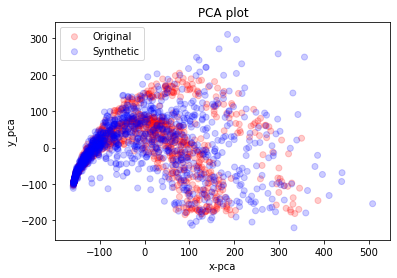

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.017s...
[t-SNE] Computed neighbors for 2000 samples in 1.474s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 29.110309
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.543983
[t-SNE] KL divergence after 300 iterations: 0.755624


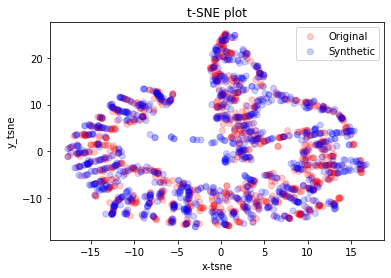

In [10]:
visualization(dp_ori_data, dp_gen_data, 'pca')
visualization(dp_ori_data, dp_gen_data, 'tsne')

Visualisation of PCA and tSNE plots for tGAN

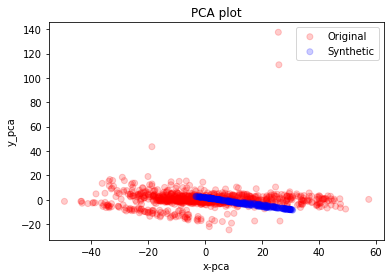

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 2000 samples in 0.002s...
[t-SNE] Computed neighbors for 2000 samples in 0.158s...
[t-SNE] Computed conditional probabilities for sample 1000 / 2000
[t-SNE] Computed conditional probabilities for sample 2000 / 2000
[t-SNE] Mean sigma: 0.001600
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.091599
[t-SNE] KL divergence after 300 iterations: 1.009931


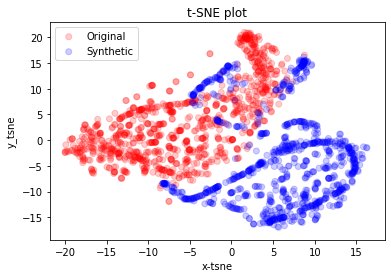

In [25]:
visualization(tgan_ori_data, tgan_gen_data, 'pca')
visualization(tgan_ori_data, tgan_gen_data, 'tsne')